In [1]:
import pickle
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
# Loading the data
pickle_in = open("dataset/shrinked/X_dense.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open("dataset/shrinked/y_dense.pickle", "rb")
y = pickle.load(pickle_in)
pickle_in.close()

# Normalizing the features
X = X / 255.0

# Converting labels to categorical
num_classes = 3  # Adjust based on your number of classes
y = tf.keras.utils.to_categorical(y, num_classes=num_classes)

# Spliting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Verifying data shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (775, 50, 50, 1)
y_train shape: (775, 3)
X_val shape: (194, 50, 50, 1)
y_val shape: (194, 3)


In [4]:
# Building the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\Perdorues\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.3595 - loss: 1.1065 - val_accuracy: 0.5206 - val_loss: 1.0662
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.5652 - loss: 0.9978 - val_accuracy: 0.7577 - val_loss: 0.5699
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.7647 - loss: 0.5434 - val_accuracy: 0.8660 - val_loss: 0.2947
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8703 - loss: 0.3326 - val_accuracy: 0.8557 - val_loss: 0.2984
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9013 - loss: 0.2323 - val_accuracy: 0.8918 - val_loss: 0.2665
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9177 - loss: 0.2147 - val_accuracy: 0.9227 - val_loss: 0.2097
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9095 - loss: 0.2348 - val_accuracy: 0.9433 - val_loss: 0.1327
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9671 - loss: 0.1265 - val_accuracy: 0.

In [6]:
# Evaluating the model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation loss: {val_loss:.4f}')
print(f'Validation accuracy: {val_accuracy * 100:.2f}%')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 1.0530e-04
Validation loss: 0.0002
Validation accuracy: 100.00%


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,090,187 (4.16 MB)

 Trainable params: 363,395 (1.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 726,792 (2.77 MB)

In [8]:
model.save('water_bottle_classifier_cnn.h5')

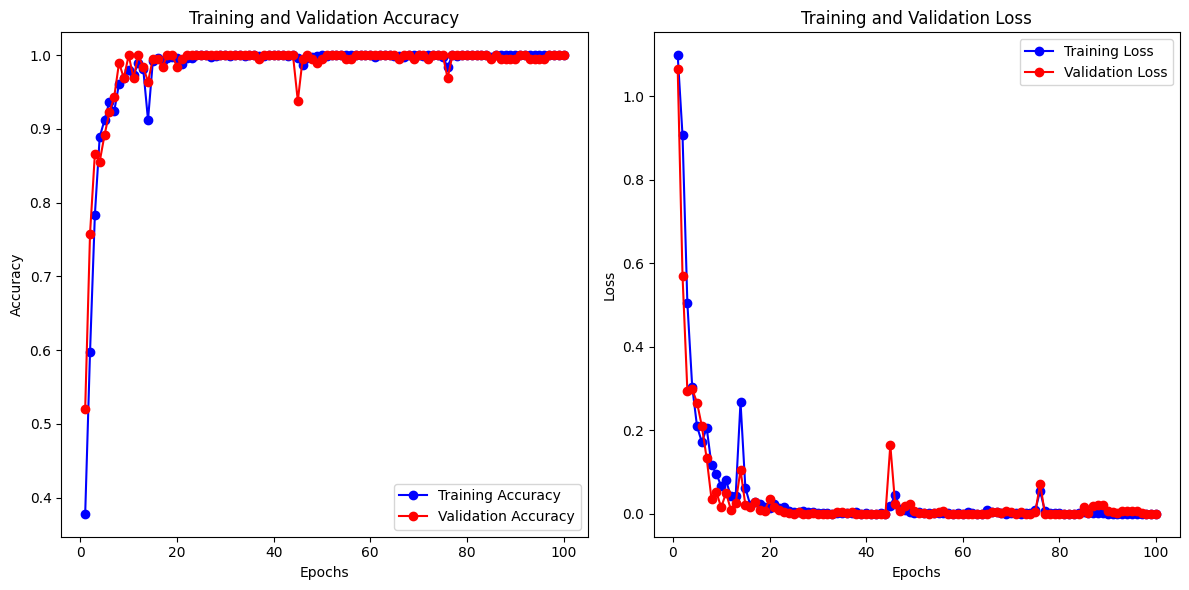

In [9]:
epochs = range(1, 101)

plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], 'bo-', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], 'bo-', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [10]:
# test the model
def test_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    y_test = np.argmax(y_test, axis=1)

    correct = np.sum(y_pred == y_test)
    total = y_test.shape[0]

    accuracy = correct / total
    return accuracy


pickle_in = open("dataset/shrinked/X_dense.pickle", "rb")
X_test = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open("dataset/shrinked/y_dense.pickle", "rb")
y_test = pickle.load(pickle_in)
pickle_in.close()

X_test = X_test / 255.0
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

test_accuracy = test_model(model, X_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
Test accuracy: 100.00%
